# Retail Sales Analysis Using Python, SQL & Power BI

In [2]:
!pip install sqlalchemy psycopg2


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
from google.colab import files
uploaded = files.upload()

Saving Sales Data.csv to Sales Data.csv


In [6]:
df = pd.read_csv('/content/Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (185950, 11)

Missing Values:
 Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Duplicates: 0


In [8]:
print(type(df['Order Date']))

<class 'pandas.core.series.Series'>


Load into SQLite for Querying

In [9]:
import sqlite3
conn = sqlite3.connect("sales.db")

df.to_sql("sales", conn, if_exists="replace", index=False)

conn.commit()


In [10]:
%reload_ext sql
%sql sqlite:///sales.db


SQL Analysis Queries

In [11]:
print(pd.read_sql('SELECT * FROM sales', conn))

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each           Order Date  \
0          1700.00  2019-12-30 00:01:00   
1           600.00  2019-

a. Monthly Sales Performance

In [12]:
query_monthly = """
SELECT
    strftime('%Y-%m', "Order Date") AS Month,
    ROUND(SUM("Sales"), 2) AS Total_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql(query_monthly, conn)

In [13]:
monthly_sales

,Month,Total_Sales
0,2019-02,2202022.42
1,2019-03,2807100.38
2,2019-04,3390670.24
3,2019-05,3152606.75
4,2019-06,2577802.26
5,2019-07,2647775.76
6,2019-08,2244467.88
7,2019-09,2097560.13
8,2019-10,3736726.88
9,2019-11,3199603.20


 b. Top 10 Cities by Revenue

In [14]:
query_city = """
SELECT
    City,
    ROUND(SUM("Sales"), 2) AS Total_Revenue
FROM sales
GROUP BY City
ORDER BY Total_Revenue DESC
LIMIT 10;
"""
top_cities = pd.read_sql(query_city, conn)
top_cities

,City,Total_Revenue
0,San Francisco,8262203.91
1,Los Angeles,5452570.80
2,New York City,4664317.43
3,Boston,3661642.01
4,Atlanta,2795498.58
5,Dallas,2767975.40
6,Seattle,2747755.48
7,Portland,2320490.61
8,Austin,1819581.75


c. Best-Selling Products

In [15]:
query_product = """
SELECT
    Product,
    ROUND(SUM("Sales"), 2) AS Total_Sales,
    SUM("Quantity Ordered") AS Quantity_Sold
FROM sales
GROUP BY Product
ORDER BY Total_Sales DESC
LIMIT 10;
"""
top_products = pd.read_sql(query_product, conn)
top_products

,Product,Total_Sales,Quantity_Sold
0,Macbook Pro Laptop,8037600.00,4728
1,iPhone,4794300.00,6849
2,ThinkPad Laptop,4129958.70,4130
3,Google Phone,3319200.00,5532
4,27in 4K Gaming Monitor,2435097.56,6244
5,34in Ultrawide Monitor,2355558.01,6199
6,Apple Airpods Headphones,2349150.00,15661
7,Flatscreen TV,1445700.00,4819
8,Bose SoundSport Headphones,1345565.43,13457
9,27in FHD Monitor,1132424.50,7550


# Visualization


Monthly Sales Trend

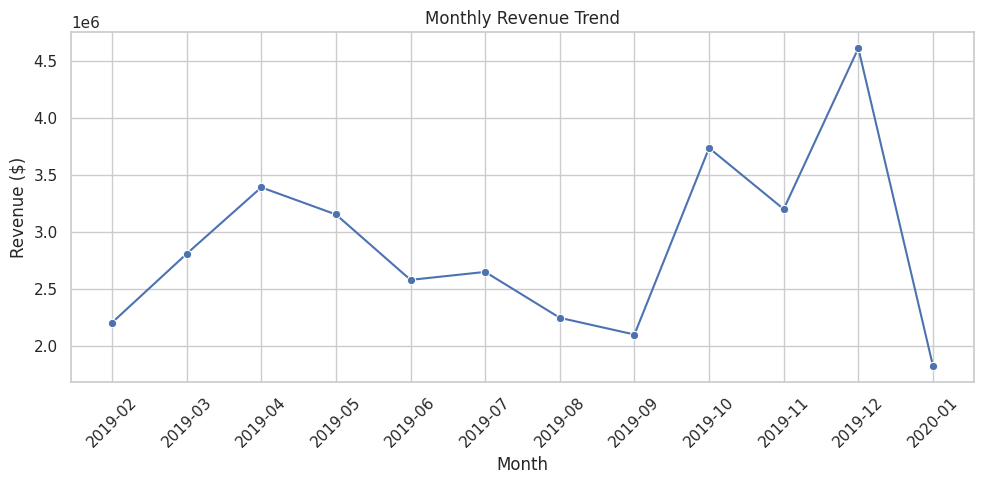

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Total_Sales", data= monthly_sales, marker="o")

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


Top 10 Cities by Revenue

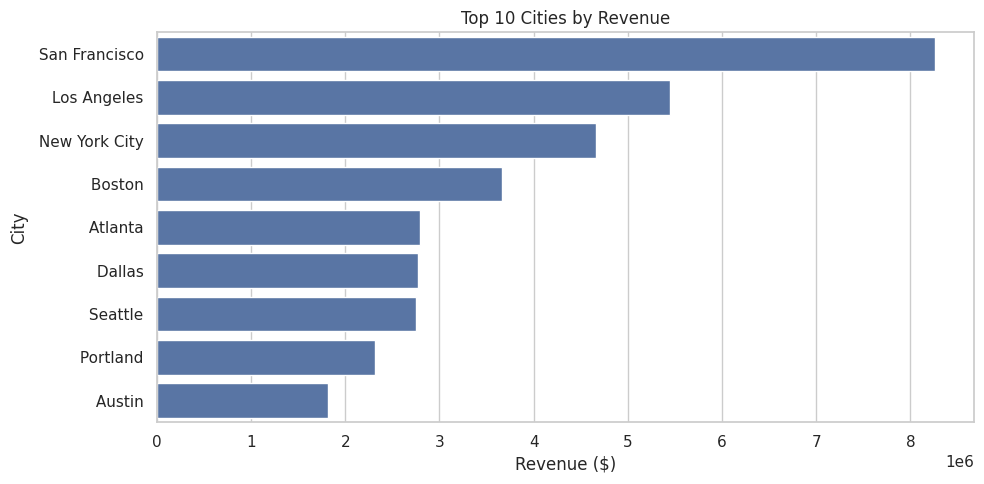

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Revenue", y="City", data=top_cities)
plt.title("Top 10 Cities by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

Top 10 Products by Sales

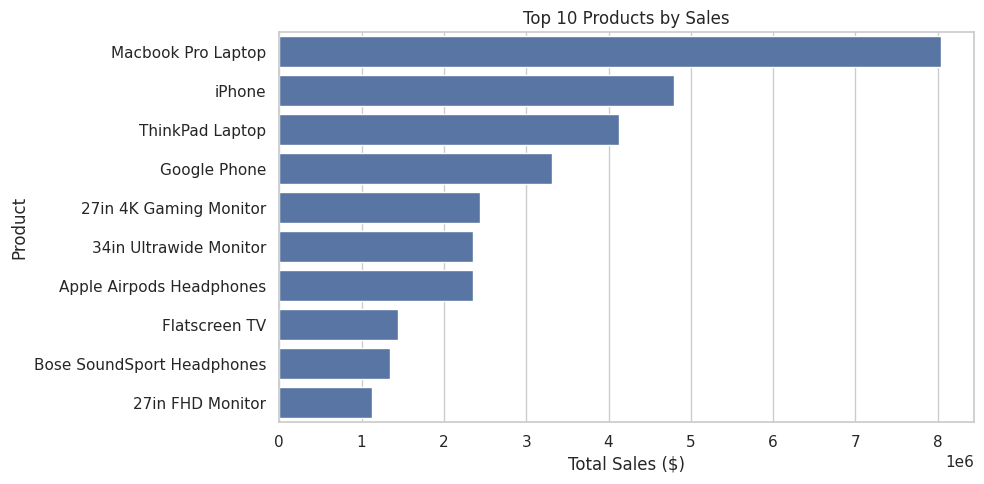

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Sales", y="Product", data=top_products)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [19]:
df.to_csv("Cleaned_Sales_Data.csv", index=False)
print("\n Cleaned dataset exported successfully for Power BI visualization.")



 Cleaned dataset exported successfully for Power BI visualization.
